In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
import scipy.stats
import math
from scipy.interpolate import make_interp_spline, BSpline, interp1d,CubicSpline


## Helper functions

In [2]:
def gamma_gran(a):
    fig, ax = plt.subplots(1, 1)
    mean, var, skew, kurt = scipy.stats.gamma.stats(a, moments='mvsk')
    x = np.linspace(scipy.stats.gamma.ppf(0.01, a),scipy.stats.gamma.ppf(0.99, a), 1000)
    ax.plot(x, scipy.stats.gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
    ax.legend(loc='best', frameon=False)
    plt.show()

def norm_gran_simplified(mean, variance,conf=0.9, debug=True, vmin=0, vmax=1, ymax=0.5, bins = 10, save=None, save_fig=None):
    std_dev = np.sqrt(variance)
    x_plot = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
    # Freeze continuous RV
    continuous_rv = scipy.stats.norm(loc=mean, scale=std_dev)
    interval = scipy.stats.norm.interval(conf,loc=mean,scale=std_dev)
    y_plot = continuous_rv.pdf(x_plot)
    z_plot = continuous_rv.cdf(x_plot)
    fig = plt.figure(figsize=fig_size)
    plt.plot(x_plot, y_plot, label='Normal Distribution')
    if debug:
        plt.plot(x_plot, z_plot, label='CDF')
    # plt.vlines(interval,0,ymax,colors='g',linestyles='dashed',label='Confidence '+str(conf))
    plt.title('Normal Distr - Mean: {}, Variance: {} Std: {:.4f}'.format(mean, variance,std_dev), fontsize=graphsize-10)
    plt.xlabel('X',fontsize=graphsize-10)
    plt.ylabel('Probability Density',fontsize=graphsize-10)
    plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
    plt.ticklabel_format(axis='both')
    plt.legend(fontsize=graphsize-10)
    plt.show()
    
    print("conf interval",interval)

    # setup support
    delta_z = (vmax -vmin)/ (bins -1)
    z = np.zeros(bins+1)
    for i in range(0, bins+1):
        if i == bins -1:
            z[i] = vmax
        else:
            z[i] = vmin + i* delta_z
    
    z_grid = z-delta_z/2
    z=z[:-1]

    # compute the probabilities using the difference in CDF
    probs = np.diff(continuous_rv.cdf(z_grid))

    total = np.sum(probs)
    print(total)
    print('probs:', probs.size,'\n',probs.round(2))
    probs = probs * 1.0/total
    print(np.sum(probs))
    print('probs normalized:', probs.size,'\n',probs.round(2))
    print("z: ", z.size,"\n",z)
    # print("z_grid: ", z_grid.size,"\n",z_grid)

    # if debug:
    #     print(prob * np.diff(bins))
    #     print(bins)
    fig = plt.figure(figsize=fig_size)
    # plt.plot(z, probs,'.', label='Discretized')
    # plt.vlines(z,0,probs, linewidth=1.5)
    h = plt.bar(z, probs, width=delta_z*0.85, alpha=0.9, color='skyblue', label='Discretized')

    plt.vlines(interval,0,np.max(probs)*1.1,colors='orangered', linewidth=3, linestyles='dashed',label='Confidence '+str(conf))

    xnew = np.linspace(vmin, vmax, 300) 
    spl = make_interp_spline(z, probs, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew, power_smooth, color='steelblue', alpha=0.8, label='Smoothed')

    plt.legend(fontsize=graphsize-18)
    plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
    plt.xlabel('Probability of Winning',fontsize=graphsize-10)
    plt.ylabel('Probability',fontsize=graphsize-10)
    plt.ylim([0,ymax])
    plt.tight_layout()
    plt.show()

    if save is not None:
        headers = ','.join([str(x) for x in range(bins)])
        # print(headers)
        to_file = np.array([z, probs])
        np.savetxt(save, to_file, header=headers, delimiter=',', fmt='%1.6f', comments='')

    if save_graphs and save_fig is not None:
        print('Saving to:'+save_fig)
        fig.savefig(save_fig, transparent=True, dpi=400)
        

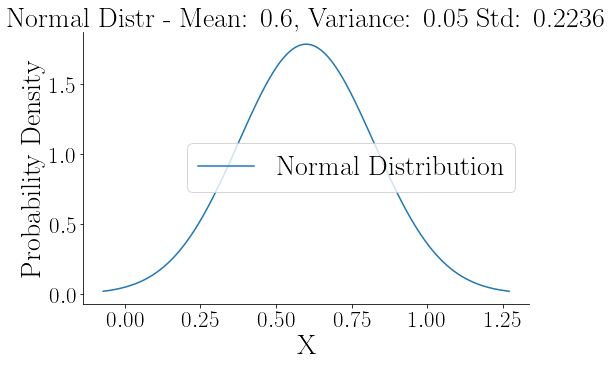

conf interval (0.3134363582770996, 0.8865636417229004)
0.9428455378096668
probs: 51 
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.02
 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01]
1.0000000000000002
probs normalized: 51 
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.02 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01]
z:  51 
 [0.    0.019 0.038 0.057 0.076 0.095 0.114 0.133 0.152 0.171 0.19  0.209
 0.228 0.247 0.266 0.285 0.304 0.323 0.342 0.361 0.38  0.399 0.418 0.437
 0.456 0.475 0.494 0.513 0.532 0.551 0.57  0.589 0.608 0.627 0.646 0.665
 0.684 0.703 0.722 0.741 0.76  0.779 0.798 0.817 0.836 0.855 0.874 0.893
 0.912 0.931 0.95 ]


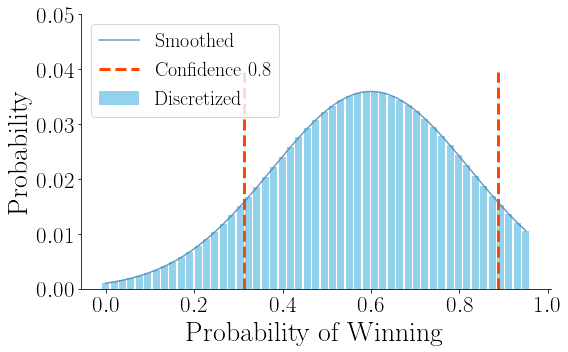

In [3]:
# Graph Formating
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'axes.spines.right':False,
    'axes.spines.top': False
})
# font size in the graph
graphsize = 38
fig_size= (8,5)
# projection code?
# gamma_gran(a=1)
#ymax = 0.2
ymax=0.05
mean = 0.6
variance = 0.05
conf = 0.8
vmin = 0.0; vmax = 0.95
desired_atoms = 51
save_graphs=False
mode='high'

norm_gran_simplified(mean, variance, conf, 
                     vmin=vmin, vmax=vmax, ymax=ymax, bins =desired_atoms,
                     debug=False,
                     save =None, 
                     #save='tests/betting_game/param_p_'+str(desired_atoms)+'.csv',
                     save_fig=None,
                     #save_fig='tests/experiments/betting_g_gran_'+mode+'/betting_g_distr_input_'+mode+'.png'
                     )

In [4]:
def verify_confidence(rx, rp, filepath=None, conf=0.8, debug=True):
    
    if filepath is not None:
        dist = pd.read_csv(filepath)
        #dist.head(10)
        rp = dist.iloc[1].to_numpy()  # output 4th row as Numpy array
        rx = dist.iloc[0].to_numpy()

    if debug:
        print("rp: ", rp)
        print("rx: ", rx)
        print(np.sum(rp))
        
    distr = scipy.stats.rv_discrete(values=(rx, rp))
    ival= distr.interval(alpha=conf)

    print('interval: ',ival)
    print('variance: ', distr.var())
    print('mean: ', distr.mean())

In [5]:
path = 'tests/betting_game/param_p_11.csv'
verify_confidence(None, None,path)
# sanity check
# verify_confidence(np.array([1.0,2.0]), np.array([0.5,0.5]))

rp:  [0.005048 0.014201 0.03344  0.065909 0.10874  0.150177 0.17362  0.168025
 0.136123 0.092313 0.052404]
rx:  [0.    0.095 0.19  0.285 0.38  0.475 0.57  0.665 0.76  0.855 0.95 ]
1.0
interval:  (0.285, 0.855)
variance:  0.04165881175662789
mean:  0.5820069550000001


In [6]:
def adjust_qr(rx, rp, rz):
    
    rz_new, rp_new = np.unique(rx, return_counts=True)
    rp_new = rp_new * rp[0]
    #rz_new= np.arange(0, len(rp_new), 1)
    
    return rx, rp_new, rz_new

In [7]:
def VaR(z, p, lim):
    var = 0
    cum_p = 0
    for j, atom in enumerate(p):
        cum_p += atom
        if cum_p>= lim:
            var = z[j]
            break
    return var

def CVaR (z, p, var, lim):
    cvar = var
    expected_c = 0 
    for i, j in enumerate(p):
        if p[i] > 0:
            expected_c += j * max(0, z[i]-var)
    cvar+= 1/(1- alpha) * expected_c
    return cvar

def variance(z, p):
    average = np.average(z, weights=p)
    variance = np.average((z-average)**2, weights=p)
    return variance

def weighted_mean(z,p):
    return np.average(z, weights=p)

def prob_threshold(z, p, thresh):
    cum_p = 0
    for j, atom in enumerate(p):        
        if z[j]>= thresh:
            cum_p += atom
            
    return cum_p

In [8]:
def l2 (u_values, v_values, u_weights=None, v_weights=None, debug=False):
    u_values = np.asarray(u_values, dtype=float)
    v_values = np.asarray(v_values, dtype=float)
    u_weights = np.asarray(u_weights, dtype=float)
    v_weights = np.asarray(v_weights, dtype=float)
    
    u_sorter = np.argsort(u_values)
    v_sorter = np.argsort(v_values)

    all_values = np.concatenate((u_values, v_values))
    all_values.sort(kind='mergesort')

    # Compute the differences between pairs of successive values of u and v.
    deltas = np.diff(all_values)

    # Get the respective positions of the values of u and v among the values of
    # both distributions.
    u_cdf_indices = u_values[u_sorter].searchsorted(all_values[:-1], 'right')
    v_cdf_indices = v_values[v_sorter].searchsorted(all_values[:-1], 'right')

    # Calculate the CDFs of u and v using their weights
    u_sorted_cumweights = np.concatenate(([0],np.cumsum(u_weights[u_sorter])))
    u_cdf = u_sorted_cumweights[u_cdf_indices] / u_sorted_cumweights[-1]

    v_sorted_cumweights = np.concatenate(([0],np.cumsum(v_weights[v_sorter])))
    v_cdf = v_sorted_cumweights[v_cdf_indices] / v_sorted_cumweights[-1]
    
    if debug:
        print("delta", deltas)
        print("cdf u:", u_cdf)
        print("cdf v:", v_cdf)
        print("square cdf u - cdf v", np.square(u_cdf - v_cdf))
        print("square diff * delta", np.multiply(np.square(u_cdf - v_cdf), deltas))
        print("sum( (square diff) *delta))", np.sum(np.multiply(np.square(u_cdf - v_cdf), deltas)))
    return np.sqrt(np.sum(np.multiply(np.square(u_cdf - v_cdf), deltas)))


## Graphs

##### DTMC

In [9]:
def dtmc_compute(idx, apdx, experiment_name, rep_type, imdp=None, xlims=[0,100], width=1,conf=0.8, prob=False, show_graph=True, debug=True, print_metrics=False, shaded=False, y_level=0.3, y_padding=0.3, alpha=0.7, spline_smooth=True):
    if debug:
        if(prob):
            print('Reading file: '+file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_prob_'+rep_type+apdx+'.csv')
        else:
            print('Reading file: '+file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_'+rep_type+apdx+'.csv')
    if prob:
        dist = pd.read_csv(file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_prob_'+rep_type+apdx+'.csv')
    else:    
        dist = pd.read_csv(file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_'+rep_type+apdx+'.csv')
    #dist.head(10)
    rx = dist['r'].to_numpy()
    rp = dist['p'].to_numpy()
    n = np.max(np.where(rp > 1e-20))
    rx = rx[0:n+1]
    rp = rp[0:n+1]

    var_dtmc = VaR(rx, rp, alpha)
    metrics = np.array([weighted_mean(rx, rp), variance(rx, rp), var_dtmc, CVaR(rx, rp, var_dtmc, alpha), prob_threshold(rx, rp, thresh)])
    # z = z[0:n+1]
    if debug:
        print(rx)
        print(n)
        print(np.sum(rp), np.allclose(np.sum(rp), 1))
        print("max p:", np.max(rp))
    
    print(rp)
    dtmc_distr = scipy.stats.rv_discrete(values=(rx, rp),name='dtmc_distr')
    if show_graph:
        # h = plt.bar(rx, rp, alpha=0.5)
        fig = plt.figure(figsize=fig_size)

        if shaded:
            # plt.bar(rx, dtmc_distr.pmf(rx), width=0.98, color='gray', alpha=0.45, linewidth=0,label='PDF')
            kernel = scipy.stats.gaussian_kde(rx, weights=rp)
            range = np.arange(0, n, 1)
            # plt.plot(range, kernel(range), label='gaussian PDF')
            # 300 represents number of points to make between T.min and T.max
            xnew = np.linspace(6, rx.max(), 300) 

            spl = make_interp_spline(rx, dtmc_distr.pmf(rx), k=3)  # type: BSpline
            power_smooth = spl(xnew)
            idx_start = (np.abs(xnew - metrics[2])).argmin()
            plt.plot(xnew, power_smooth, color='k', alpha=0.8, label='Smoothed PDF')
            
            plt.fill_between(xnew[idx_start:], power_smooth[idx_start:], 0, color='gray', alpha=.6)
            
            plt.vlines(x=[metrics[0], metrics[2], metrics[3]], linestyles='dashed', ymin=0, ymax=1, color = 'k')
            
            plt.text(metrics[0]+y_padding, y_level+0.15, r'$\mathbb{E}$', fontsize=graphsize-10,  rotation=90, verticalalignment='center')
            plt.text(metrics[2]-y_padding-1.5, y_level, r'$\mathsf{VaR}_{'+str(alpha)+r'}$', fontsize=graphsize-10, rotation=90, verticalalignment='center')
            plt.text(metrics[3]+y_padding, y_level, r'$\mathsf{CVaR}_{'+str(alpha)+r'}$', fontsize=graphsize-10, rotation=90, verticalalignment='center')

        else:
            if (xmax-xmin)>400:
                if prob:
                    h = plt.bar(rx, rp, width=1, alpha=0.5, label='PDF')
                else:
                    h = plt.bar(rx, dtmc_distr.pmf(rx), width=1, alpha=0.5, label='PDF')
            else:
                if prob:
                    h = plt.bar(rx, rp, width=width, alpha=0.9, color='darkturquoise', label='PDF')
                else:
                    h = plt.bar(rx, dtmc_distr.pmf(rx), width=width, alpha=0.5, label='PDF')
            
            if imdp is not None:
                plt.vlines(x=imdp, linestyles='dashed', ymin=0, ymax=np.max(rp)*1.1, linewidth=3, color = 'darkorange', label='Robust VI')
            
            if not spline_smooth:
                kernel = scipy.stats.gaussian_kde(rx, weights=rp)
                if prob:
                    range = np.arange(np.min(rx), np.max(rx)+10, 20)
                else:
                    range = np.arange(0, n, 0.1)
                plt.plot(range, kernel(range), label='Smoothed PDF')
            else:
                
                xnew = np.linspace(rx.min(), rx.max(), 200) 
                rx_smooth = np.sort(rx)
                rp_smooth =np.array([p for _,p in sorted(zip(rx, rp), key=lambda pair: pair[0])])
                
                print(rx_smooth)
                print(rp_smooth)
                
                spl = make_interp_spline(rx_smooth, rp_smooth, k=3)  # type: BSpline
                cubic_spl = interp1d(rx_smooth, rp_smooth, kind='cubic')
                power_smooth = spl(xnew)
                plt.plot(xnew, cubic_spl(xnew), color='teal', alpha=0.9, label='Smoothed PDF')
        plt.xlim(xlims)
        plt.ylim([0,ymax])

        if not shaded:
            plt.legend(fontsize=graphsize-18)
        plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
        plt.ticklabel_format(axis='both')
        plt.xlabel('Value', fontsize=graphsize-10)
        plt.ylabel('Probability', fontsize=graphsize-10)
        # plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)
        plt.tight_layout()
        plt.show()
    # plt.fill_between(range, kernel(range))

    if save_graphs:
        print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_'+rep_type+apdx+".png")
        fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_dtmc_'+alg_type+'_'+rep_type+apdx+".png", transparent=True, dpi=400)

    if debug or print_metrics:
        print("DTMC for",alg_type, " E:", weighted_mean(rx, rp),", variance:",variance(rx, rp),", VaR:",var_dtmc,", CVaR:", CVaR(rx, rp, var_dtmc, alpha),
              ", Conf ",conf,":",dtmc_distr.interval(conf),
              ", Threshold:",prob_threshold(rx, rp, thresh))
    return rx,rp, metrics, dtmc_distr

##### Expected Value Iteration

In [10]:
def exp_compute(idx, apdx, experiment_name, rep_type, imdp=None, xlims=[0,100], conf=0.8, width=0.3, show_graph=True, debug=True, print_metrics=False, elements=False, figure = None, smooth=False, alpha=0.7, prob=True):
    
    full_file=""
    if(prob):
        full_file =file_path+experiment_name+'/'+experiment_name+'_distr_exp_prob_'+rep_type+apdx+'.csv'
        dist = pd.read_csv(full_file)
    else:
        full_file =file_path+experiment_name+'/'+experiment_name+'_distr_exp_'+rep_type+apdx+'.csv'
        dist = pd.read_csv(full_file)
    if debug:
            print('Reading file: '+full_file)
    #dist.head(10)
    rx_e = dist['r'].to_numpy()
    rp_e = dist['p'].to_numpy()
    z_e = dist['z'].to_numpy()
    if 'qr' in rep_type:
        if debug:
            print('converting distribution from qr')
        rx_e, rp_e, z_e = adjust_qr(rx_e, rp_e, z_e)
        # print(len(rx_e), rx_e)
        # print(len(rp_e), rp_e)
        # print(len(z_e), z_e)

    n = np.max(np.where(rp_e > 1e-8))
    rx_e = rx_e[0:n+1]
    rp_e = rp_e[0:n+1]
    z_e = z_e[0:n+1]
    
    if debug:
        print(len(dist.index))
        print(np.sum(rp_e), np.allclose(np.sum(rp_e), 1))
        print("max p:", np.max(rp_e))
    
    distr_e = scipy.stats.rv_discrete(values=(z_e, rp_e))
    if show_graph:
        # h = plt.bar(rx_e, rp_e, alpha=0.5)
        fig=plt.figure(figsize=fig_size)
        
        if not elements:
            h = plt.bar(z_e, rp_e, alpha=0.5, width=width, color='g', label='PDF')
        
        else:
            h = plt.bar(z_e, rp_e, alpha=0.8, width=0.3, color='g')
            plt.plot(z_e, rp_e, 'go')
            if not smooth:
                plt.bar(figure[0], figure[1].pmf(figure[0]), width=0.98, color='k', alpha=0.3, linewidth=0,label='PDF')
            else:
                # 30`0 represents number of points to make between T.min and T.max
                xnew = np.linspace(6, figure[0].max(), 300) 

                spl = make_interp_spline(figure[0], figure[1].pmf(figure[0]), k=3)  # type: BSpline
                power_smooth = spl(xnew)

                plt.plot(xnew, power_smooth, color='k', alpha=0.5, label='Smoothed PDF')
                plt.fill_between(xnew, power_smooth, 0, color='gray', alpha=.3)
            
        kernel = scipy.stats.gaussian_kde(z_e, weights=rp_e)
        if 'qr' in rep_type:
            range = z_e
        else:
            range = np.arange(0, z_e[-1]+z_e[1], z_e[1])

        if not elements:
            plt.plot(range, kernel(z_e), color='g', label='Smoothed PDF')
        
        if imdp is not None:
            plt.vlines(x=imdp, linestyles='dashed', ymin=0, ymax=ymax, color = 'r')
        
        plt.xlim(xlims)
        plt.ylim([0,ymax])

        if not elements:
            plt.legend(loc='upper left', fontsize=graphsize-18)

        plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
        plt.ticklabel_format(axis='both')
        plt.xlabel('Value', fontsize=graphsize-10)
        plt.ylabel('Probability', fontsize=graphsize-10)
        # plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)
        plt.tight_layout()
        plt.show()
    # plt.fill_between(range, kernel(range))

        if save_graphs:
            if not smooth:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_exp_'+rep_type+apdx+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_exp_'+rep_type+apdx+".png", transparent=True, dpi=400)
            else:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_exp_'+rep_type+apdx+'_smooth'+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_exp_'+rep_type+apdx+'_smooth'+".png", transparent=True, dpi=400)
                
    
    var_exp = VaR(z_e, rp_e, alpha)
    if debug or print_metrics:
        print(f"Risk neutral DVI: E:{weighted_mean(z_e, rp_e)}, variance:{variance(z_e, rp_e)}, VaR:{var_exp}, CVaR:{CVaR(z_e, rp_e, var_exp, alpha)}, Conf {conf}: {distr_e.interval(conf)}, threshold:{prob_threshold(z_e, rp_e, thresh)}")
    return z_e, rp_e, np.array([weighted_mean(z_e, rp_e), variance(z_e, rp_e), var_exp, CVaR(z_e, rp_e, var_exp, alpha), prob_threshold(z_e, rp_e, thresh)])

##### CVaR

In [11]:
def cvar_compute(idx, apdx, experiment_name, rep_type, xlims=[0,100],conf=0.8, show_graph=True, debug=True, print_metrics=False, elements=False, figure=None, smooth =False, alpha=0.7):
    if debug:
        print('Reading file: '+file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+'.csv')
    dist = pd.read_csv(file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+'.csv')
    #dist.head(10)
    rx_c = dist['r'].to_numpy()
    rp_c = dist['p'].to_numpy()
    z_c = dist['z'].to_numpy()
    if 'qr' in rep_type:
        if debug:
            print('converting distribution from qr')
        rx_c, rp_c, z_c = adjust_qr(rx_c, rp_c, z_c)
    n = np.max(np.where(rp_c > 1e-6))
    rx_c = rx_c[0:n+1]
    rp_c = rp_c[0:n+1]
    z_c = z_c[0:n+1]
    if debug:
        print(n)
        print(np.sum(rp_c), np.allclose(np.sum(rp_c), 1))
        print("max p:", np.max(rp_c))
    
    distr_c = scipy.stats.rv_discrete(values=(z_c, rp_c))
    if show_graph:
        # h = plt.bar(rx_c, rp_c, alpha=0.5)
        fig=plt.figure(figsize=fig_size)
            
        if not elements:
            h = plt.bar(z_c, rp_c, alpha=0.5, color='g', label='PDF')
        else:
            h = plt.bar(z_c, rp_c, alpha=0.8, width=0.3, color='g')
            plt.plot(z_c, rp_c, 'go')
            if not smooth:
                plt.bar(figure[0], figure[1].pmf(figure[0]), width=0.98, color='k', alpha=0.3, linewidth=0,label='PDF')
            else:
                # 30`0 represents number of points to make between T.min and T.max
                xnew = np.linspace(6, figure[0].max(), 300) 

                spl = make_interp_spline(figure[0], figure[1].pmf(figure[0]), k=3)  # type: BSpline
                power_smooth = spl(xnew)

                plt.plot(xnew, power_smooth, color='k', alpha=0.5, label='Smoothed PDF')
                plt.fill_between(xnew, power_smooth, 0, color='gray', alpha=.3)
        kernel = scipy.stats.gaussian_kde(z_c, weights=rp_c)
        if 'qr' in rep_type:
            range = z_c
        else:
            range = np.arange(0, z_c[-1]+z_c[1], z_c[1]) 
        
        if not elements:
            plt.plot(range, kernel(range), color='g', label='Smoothed PDF')
        plt.xlim(xlims)
        plt.ylim([0,ymax])

        if not elements:
            plt.legend(loc='upper right', fontsize=graphsize-18)
        plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
        plt.ticklabel_format(axis='both')
        plt.xlabel('Value', fontsize=graphsize-10)
        plt.ylabel('Probability', fontsize=graphsize-10)
        # plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)
        plt.tight_layout()
        plt.show()
        # plt.fill_between(range, kernel(range))

        if save_graphs:
           
            if not smooth:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+".png", transparent=True, dpi=400)
            else:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+'_smooth'+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_cvar_'+rep_type+apdx+'_smooth'+".png", transparent=True, dpi=400)

    var_cvar = VaR(z_c, rp_c, alpha)
    if debug or print_metrics:
        print(f"Risk sensitive DVI: E:{weighted_mean(z_c, rp_c)}, variance:{variance(z_c, rp_c)}, VaR:{var_cvar}, CVaR:{CVaR(z_c, rp_c, var_cvar, alpha)}, Conf  {conf}: {distr_c.interval(conf)}, threshold:{prob_threshold(z_c, rp_c, thresh)}")
    return z_c, rp_c, np.array([weighted_mean(z_c, rp_c), variance(z_c, rp_c), var_cvar, CVaR(z_c, rp_c, var_cvar, alpha), prob_threshold(z_c, rp_c, thresh)])

#### Setup

Set the metric parameters and graph parameters in next cell.

In [12]:
# graph figure parameters
xmax = 100
xmin=20
ymax=0.05
fig_size= (8,5)

Set experiment name and representation type in the following cell.
Make sure to run the experiments using `run_experiments.py` before visualization.

In [14]:
# Graph Formating
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'axes.spines.right':False,
    'axes.spines.top': False
})
# font size in the graph
graphsize = 38
# experiments folder path, does not need changing
file_path = 'tests/experiments/'
# Change this to select the experiment to visualize
experiment_name='betting_g_gran_low' 
apdx =  [''] 
alg_type = 'cvar' # Used only for the DTMC graph
rep_type = 'c51' # 'qr' or 'c51'
save_graphs = False # if set to true, save the graph to a png file
num_metrics = 5 # exp val, variance, var, cvar, prob>thresh

In [15]:
metrics_dtmc = np.zeros([len(apdx), num_metrics])
metrics_e = np.zeros([len(apdx), num_metrics])
metrics_c = np.zeros([len(apdx), num_metrics])
print_metrics=True

##### Base experiment Visualization
This cell shows the graph for the base experiment for the selected algorithms followed by a set of distributional metrics in the following order:
* Expected Value
* Variance
* Value at Risk(alpha)
* Conditional Value at Risk(alpha)
* Probability of the cost to be greater than a threshold.

['vi', 'exp', 'cvar', 'dtmc'] are the possible options for the DTMC graph (in `algs`)
- 'vi': PRISM VI algorithm for MDP + DTMC method
- 'exp': risk neutral DVI
- 'cvar' : risk sensitive DVI
- 'dtmc': DTMC method run on a DTMC model

---DTMC---
Reading file: tests/experiments/betting_g_gran_low/betting_g_gran_low_distr_dtmc_exp_prob_c51_test.csv
[98.631158 97.632433 95.975706 93.308315 89.185599 83.219371 75.292387
 65.728465 55.299904 44.985082 35.459822]
10
1.0 True
max p: 0.17362
[0.005048 0.014201 0.03344  0.065909 0.10874  0.150177 0.17362  0.168025
 0.136123 0.092313 0.052404]
[35.459822 44.985082 55.299904 65.728465 75.292387 83.219371 89.185599
 93.308315 95.975706 97.632433 98.631158]
[0.052404 0.092313 0.136123 0.168025 0.17362  0.150177 0.10874  0.065909
 0.03344  0.014201 0.005048]


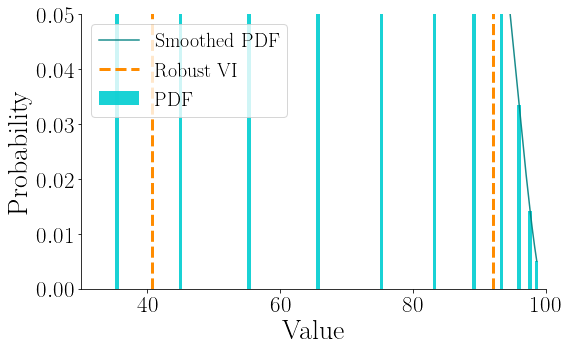

DTMC for exp  E: 71.09415390403001 , variance: 296.0513791288948 , VaR: 44.985082 , CVaR: 311.0674182907 , Conf  0.8 : (44.985082, 93.30831500000001) , Threshold: 0
---DVI---
Reading file: tests/experiments/betting_g_gran_low/betting_g_gran_low_distr_exp_prob_c51_test.csv
201
1.0 True
max p: 0.1274291802770665


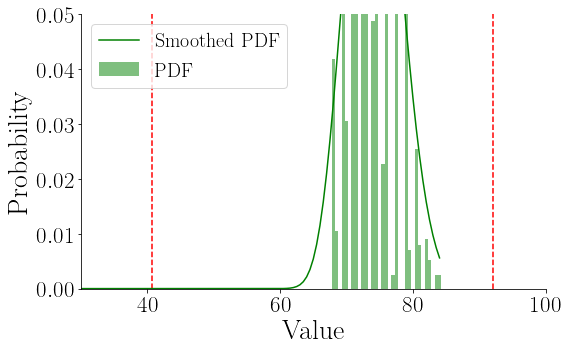

Risk neutral DVI: E:74.16187465465055, variance:11.344449884905774, VaR:79.0, CVaR:80.2680421062844, Conf 0.8: (69.5, 79.0), threshold:0


In [16]:
# Cvar alpha parameter
# 0.7 default
# 0.8 for ds_treasure, betting_game, grid 150
# 0.9 for SSP comparison benchmarks and drones
alpha=0.9
conf=0.8
# threshold value when computing 
# the probability of a cost higher than the set threshold
# this parameter is to be varied based on the benchmark
thresh=340
algs= ['exp'] # ['vi', 'exp', 'cvar','dtmc'] 
show_graph = True # show the distribution graph
appendix  = '_test' # appendix if applicable, add an '_' before the appendix set with the running script
prob=True
interval_imdp = [40.70974350857195, 92.06091288631308]

print('---DTMC---')
for idx, alg_type in enumerate(algs):
    _,_,_,_ = dtmc_compute(idx, appendix, experiment_name, rep_type, imdp=interval_imdp, xlims=[30,xmax],  width=0.5, alpha=alpha, show_graph=show_graph, debug=True, print_metrics=True, prob=prob)
print('---DVI---')
if 'exp' in algs or 'dtmc' in algs:
    _,_,_ = exp_compute(0, appendix, experiment_name, rep_type, imdp=interval_imdp, xlims=[30,xmax], width=0.5, conf=0.8, alpha=alpha, show_graph=show_graph, debug=True, print_metrics=True, prob=prob)
if 'cvar' in algs:
    _,_,_ = cvar_compute(0, appendix, experiment_name, rep_type, xlims=[xmin,xmax], alpha=alpha, show_graph=show_graph, debug=True, print_metrics=True)

In [84]:
save_dtmc=True
dtmc_arr= np.array([
98.63115811815427, 97.63243343592656, 95.97570618703215, 93.30831468390237, 89.1855986951147, 83.21937133712427, 75.29238655614088, 65.72846549285454, 55.29990423970922, 44.9850819612174, 35.4598220524004
])

dtmc_weights = np.array([
0.005048, 0.014201, 0.03344, 0.065909, 0.10874, 0.150177, 0.17362, 0.168025, 0.136123, 0.092313, 0.052404
])

verify_confidence(dtmc_arr, dtmc_weights, debug=False)

if save_dtmc:
    # print(headers)
    to_file = np.array([dtmc_arr, dtmc_weights])
    np.savetxt('tests/experiments/betting_g_gran_low/betting_g_gran_low_distr_dtmc_exp_prob_c51_test.csv', to_file.T, header='r,p', delimiter=',', fmt='%1.6f', comments='')

interval:  (44.9850819612174, 93.30831468390237)
variance:  296.0513763289018
mean:  71.09415395125765


##### Running varying atoms
Print the distributional metrics for :

* metrics for risk-neutral DVI distributions 
* metrics for DTMC distributions induced from risk-neutral DVI policies

In [ ]:
# apdx = ['_1','_10', '_25', '_50', '_75', '_100']
apdx = ['_1','_10', '_25', '_50', '_75', '_100','_500', '_1000', '_5000']
rep_type = 'c51' # c51 or qr
metrics_dtmc = np.zeros([len(apdx), num_metrics])
metrics_e = np.zeros([len(apdx), num_metrics])
metrics_c = np.zeros([len(apdx), num_metrics])
print_metrics=True

In [ ]:
for idx, apd in enumerate(apdx):
    if 'c51' in rep_type and idx > 5:
        continue
    _,_, metrics_e[idx] = exp_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False, print_metrics=print_metrics)

Risk neutral DVI: E:61.9213833160332, variance:2357.8806198322054, VaR:100.0, CVaR:100.0, threshold:0.6192138331603317
Risk neutral DVI: E:61.92138331603321, variance:901.4685169114827, VaR:100.0, CVaR:100.0, threshold:0.837291368050781
Risk neutral DVI: E:61.9213833160332, variance:888.7021126906427, VaR:100.0, CVaR:100.0, threshold:0.7964032201054685
Risk neutral DVI: E:61.9213833160332, variance:887.0783985970139, VaR:100.0, CVaR:100.0, threshold:0.8008584379179685
Risk neutral DVI: E:61.921383316033186, variance:886.9737771025054, VaR:100.0, CVaR:100.0, threshold:0.7995124471562496
Risk neutral DVI: E:61.921383316033214, variance:886.7577351539885, VaR:100.0, CVaR:100.0, threshold:0.8006405697539063


In [ ]:
alg_type = 'exp'
print('DTMC distribution for alg:', alg_type)
for idx, apd in enumerate(apdx):
    if 'c51' in rep_type and idx > 5:
        continue
    _,_, metrics_dtmc[idx],_ = dtmc_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False, print_metrics=print_metrics)

DTMC distribution for alg: exp
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061


##### Running varying slack variable atoms
Print the distributional metrics for :

* metrics for risk-sensitive DVI distributions 
* metrics for DTMC distributions induced from risk-sensitive DVI policies

In [ ]:
if 'c51' in rep_type:
    apdx =['_0', '_10', '_25', '_50', '_75', '_100']
for idx, apd in enumerate(apdx):
    if idx > 5:
        continue
    _,_, metrics_c[idx] = cvar_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False, print_metrics=print_metrics)

Risk sensitive DVI: E:61.92138331603321, variance:886.7577351539885, VaR:100.0, CVaR:100.0, threshold:0.8006405697539063
Risk sensitive DVI: E:87.79384944140624, variance:32.959813345628994, VaR:90.0, CVaR:94.6789744140625, threshold:0.9999999999999998
Risk sensitive DVI: E:85.28002082495115, variance:55.90611713666594, VaR:90.0, CVaR:96.21042062988282, threshold:0.9999999999999999
Risk sensitive DVI: E:85.28002082495115, variance:55.90611713666594, VaR:90.0, CVaR:96.21042062988282, threshold:0.9999999999999999
Risk sensitive DVI: E:85.28002082495115, variance:55.90611713666594, VaR:90.0, CVaR:96.21042062988282, threshold:0.9999999999999999
Risk sensitive DVI: E:85.28002082495115, variance:55.90611713666594, VaR:90.0, CVaR:96.21042062988282, threshold:0.9999999999999999


In [ ]:
alg_type = 'cvar'
print('DTMC distribution for alg:', alg_type)
for idx, apd in enumerate(apdx):
    if 'c51' in rep_type and idx > 5:
        continue
    _,_, metrics_dtmc[idx],_ = dtmc_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False, print_metrics=print_metrics)

DTMC distribution for alg: cvar
DTMC: E: 61.921383316033214 , variance: 886.7577351539885 , VaR: 100 , CVaR: 100.0 , Threshold: 0.8006405697539061
DTMC: E: 87.79384944140625 , variance: 32.95981334562899 , VaR: 90 , CVaR: 94.6789744140625 , Threshold: 0.9999999999999998
DTMC: E: 85.28002082495117 , variance: 55.906117136665934 , VaR: 90 , CVaR: 96.2104206298828 , Threshold: 0.9999999999999998
DTMC: E: 85.28002082495117 , variance: 55.906117136665934 , VaR: 90 , CVaR: 96.21042062988282 , Threshold: 0.9999999999999998
DTMC: E: 85.28002082495117 , variance: 55.906117136665934 , VaR: 90 , CVaR: 96.21042062988282 , Threshold: 0.9999999999999998
DTMC: E: 85.28002082495115 , variance: 55.90611713666593 , VaR: 90 , CVaR: 96.21042062988282 , Threshold: 0.9999999999999999


##### Distributional distance between DTMC and DVI distributions

This goes through the experiment which varies the distributional approximation for either risk neutral ('exp') or risk-sensitive DVI ('cvar').

* `l2` : denotes the Cramer distributional distance
* `w1`: denotes 1-Wasserstein distributional distance


In [ ]:

apdx = ['_1','_10', '_25', '_50', '_75', '_100','_500', '_1000', '_5000']

alg_type = 'exp' # Set to 'exp' or 'cvar'
rep_types = [ 'c51', 'qr'] # c51 or qr
experiment_name='betting_g'

metrics_dtmc = np.zeros([len(apdx), num_metrics])
metrics_e = np.zeros([len(apdx), num_metrics])
metrics_c = np.zeros([len(apdx), num_metrics])
print_metrics=True

distance = np.zeros([len(apdx)])
distance2 =np.zeros([len(apdx)])

if 'cvar' in alg_type:
    apdx = [el+'_va' for el in apdx]

for rep_type in rep_types:
    print(rep_type)
    if 'c51' in rep_type:
        print('Number of atoms:', apdx[:6])
        print('----- l2-----')
    elif 'qr' in rep_type:
        print('Number of atoms:',apdx)
        print('----- l2-----')

    for idx, apd in enumerate(apdx):
        
        if 'c51' in rep_type and idx > 5:
            continue
        rx, rp, metrics_dtmc[idx],_ = dtmc_compute(idx,  apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False)

        if 'exp' in alg_type:
            rx_v, rp_v, metrics_e[idx] = exp_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False)
        else:
            rx_v, rp_v, metrics_c[idx] = cvar_compute(idx, apd, experiment_name, rep_type, alpha=alpha, show_graph=False, debug=False)

        if 'c51' in rep_type:
            distance[idx] = l2(rx, rx_v, rp, rp_v, debug=False)

        elif 'qr' in rep_type:
            distance2[idx] = scipy.stats.wasserstein_distance(rx, rx_v, rp, rp_v)
            distance[idx] = l2(rx, rx_v, rp, rp_v, debug=False)
            
        print(distance[idx])
    
    # Uncomment to print wasserstein p=1 distance for Quantile representation
    # if 'qr' in rep_type:
    #     print('----- w1-----')
    #     for idx in range(len(apdx)):
    #         print(distance2[idx])

c51
Number of atoms: ['_1', '_10', '_25', '_50', '_75', '_100']
----- l2-----
2.621336724135326
0.3372088602433126
0.15348469666713258
0.062001369828988254
0.08430257655691833
1.7333351416399796e-16
qr
Number of atoms: ['_1', '_10', '_25', '_50', '_75', '_100', '_500', '_1000', '_5000']
----- l2-----
3.735708915046805
0.8458606925217265
0.26592291472234386
0.11258396052321046
0.058187075519962404
0.060143485367470335
0.009836035167883679
0.006045974782232942
0.0009023606658701151


#### Example figure

In [ ]:
# Convert a generic distribution to a categorical distribution
def get_support(arr_p, rx, rz, debug=False):
    atoms = len(rz)
    dtmc_atoms = len(rx)
    m = np.zeros([atoms])
    b = 0
    vmin = rz[0]; vmax= rz[-1]
    delta_z = abs(rz[1] - rz[0])
    if debug:
        print(f"m:{m}\n b:{b}, atoms:{atoms}, vmin:{vmin}, vmax:{vmax}, delta_z:{delta_z}\n rz: {rz}")
        print(arr_p)
        print("rx: ", rx)
    
    assert delta_z >0 and atoms >0 or dtmc_atoms >0

    for j in range(dtmc_atoms):
        temp = max(vmin, min(vmax, rx[j]))
        b = (temp - vmin) / delta_z
        l= int(math.floor(b)); u= int(math.ceil(b));
    
        if ( l- u != 0):
                m[l] += arr_p[j] * (u -b);
                m[u] += arr_p[j] * (b-l);
        else:
                m[l] += arr_p[j];
    
    return m

def plot_distr(rx_c, rp_c, z_c, apdx, experiment_name, rep_type, show_graph=True, debug=True, print_metrics=False, elements=False, figure=None, smooth =False, alpha=0.7, save_graphs=False):
    n = np.max(np.where(rp_c > 1e-6))
    rx_c = rx_c[0:n+1]
    rp_c = rp_c[0:n+1]
    z_c = z_c[0:n+1]
    if debug:
        print(n)
        print(np.sum(rp_c), np.allclose(np.sum(rp_c), 1))
        print("max p:", np.max(rp_c))
    
    if show_graph:
        distr_c = scipy.stats.rv_discrete(values=(z_c, rp_c))
        # h = plt.bar(rx_c, rp_c, alpha=0.5)
        fig=plt.figure(figsize=fig_size)
            
        if not elements:
            h = plt.bar(z_c, rp_c, alpha=0.5, color='g', label='PDF')
        else:
            h = plt.bar(z_c, rp_c, alpha=0.8, width=0.3, color='g')
            plt.plot(z_c, rp_c, 'go')
            if not smooth:
                plt.bar(figure[0], figure[1].pmf(figure[0]), width=0.98, color='k', alpha=0.3, linewidth=0,label='PDF')
            else:
                # 30`0 represents number of points to make between T.min and T.max
                xnew = np.linspace(6, figure[0].max(), 300) 

                spl = make_interp_spline(figure[0], figure[1].pmf(figure[0]), k=3)  # type: BSpline
                power_smooth = spl(xnew)

                plt.plot(xnew, power_smooth, color='k', alpha=0.5, label='Smoothed PDF')
                plt.fill_between(xnew, power_smooth, 0, color='gray', alpha=.3)
        kernel = scipy.stats.gaussian_kde(z_c, weights=rp_c)
        if 'qr' in rep_type:
            range = z_c
        else:
            range = np.arange(0, z_c[-1]+z_c[1], z_c[1]) 
        
        if not elements:
            plt.plot(range, kernel(range), color='g', label='Smoothed PDF')
        plt.xlim([xmin,xmax])
        plt.ylim([0,ymax])

        if not elements:
            plt.legend(loc='upper right', fontsize=graphsize-10)
        plt.tick_params(axis='both', which='major', labelsize=graphsize-15)
        plt.ticklabel_format(axis='both')
        plt.xlabel('Value', fontsize=graphsize-10)
        plt.ylabel('Probability', fontsize=graphsize-10)
        # plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)
        plt.tight_layout()
        plt.show()
        # plt.fill_between(range, kernel(range))

        if save_graphs:
            if not smooth:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_cvar_fake_'+rep_type+apdx+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_cvar_fake_'+rep_type+apdx+".png", transparent=True, dpi=400)
            else:
                print('Saving to:'+file_path+experiment_name+'/'+experiment_name+'_distr_cvar_fake_'+rep_type+apdx+'_smooth'+".png")
                fig.savefig(file_path+experiment_name+'/'+experiment_name+'_distr_cvar_fake_'+rep_type+apdx+'_smooth'+".png", transparent=True, dpi=400)

    var_cvar = VaR(z_c, rp_c, alpha)
    if debug or print_metrics:
        print(f"E:{weighted_mean(z_c, rp_c)}, variance:{variance(z_c, rp_c)}, VaR:{var_cvar}, CVaR:{CVaR(z_c, rp_c, var_cvar, alpha)}, threshold:{prob_threshold(z_c, rp_c, thresh)}")
    return z_c, rp_c, np.array([weighted_mean(z_c, rp_c), variance(z_c, rp_c), var_cvar, CVaR(z_c, rp_c, var_cvar, alpha), prob_threshold(z_c, rp_c, thresh)])

---DTMC---


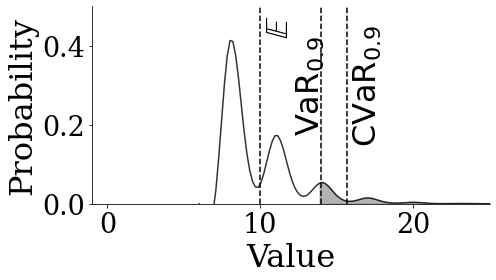

DTMC for cvar  E: 9.990613323385194 , variance: 6.331485249234092 , VaR: 14 , CVaR: 15.664663815478857 , Threshold: 6.024641900436632e-05
---DVI---


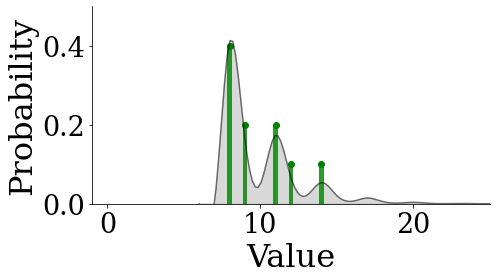

Risk sensitive DVI: E:9.8, variance:3.96, VaR:12.0, CVaR:14.0, threshold:0


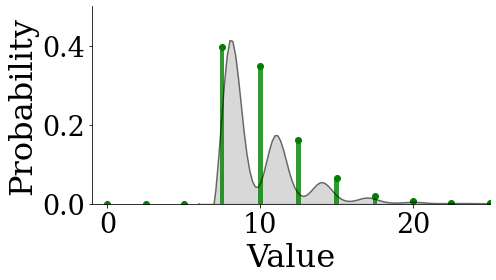

E:9.989478979408885, variance:7.418605023072939, VaR:12.5, CVaR:15.923790024181617, threshold:0


In [ ]:

xmax = 25
ymax = 0.5
algs=['cvar'] #['vi', 'exp', 'cvar']
smoothed= True
graphsize = 42
alpha=0.9
fig_size= (7,4)

print('---DTMC---')
for idx, alg_type in enumerate(algs):
    rx,rp,_,dist = dtmc_compute(idx, '_ex_fig_2', 'test', 'c51', alpha=alpha, show_graph=True, debug=False, print_metrics=True, shaded=True, y_padding=0.28)

print('---DVI---')
if 'exp' in algs:
    _,_,_ = exp_compute(idx, '_ex_fig_2', 'test', 'c51', alpha=alpha, show_graph=True, debug=False, print_metrics=True, elements=True, figure=(rx, dist), smooth=smoothed)
    _,_,_ = exp_compute(idx, '_ex_fig_2', 'test', 'qr', alpha=alpha, show_graph=True, debug=False, print_metrics=True, elements=True, figure=(rx, dist), smooth=smoothed)
else:
    rz,_,_ = cvar_compute(idx, '_ex_fig_2', 'test', 'c51', alpha=alpha, show_graph=False, debug=False, print_metrics=False, elements=True, figure=(rx, dist), smooth=smoothed)
    _,_,_ = cvar_compute(idx, '_ex_fig_2', 'test', 'qr', alpha=alpha, show_graph=True, debug=False, print_metrics=True, elements=True, figure=(rx, dist), smooth=smoothed)

m = get_support(rp, rx, rz)

_,_,_ = plot_distr(rx, m, rz, '_ex_fig_2', 'test', 'c51', alpha=alpha, show_graph=True, debug=False, print_metrics=True, elements=True, figure=(rx, dist), smooth=smoothed)

